<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/ejer_interpol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicios Interpolación

### En todos los casos dibujar el poolinomio interpolante

In [0]:
import numpy as np
import sympy as sym
%matplotlib inline
import matplotlib.pyplot as plt
np.set_printoptions(precision = 6)   # solo dos decimales
np.set_printoptions(suppress = True) # no usar notación exponencial

In [0]:
def lagrange(xa,ya):
    n = len(xa)
    x = sym.Symbol('x')
# Polinomio
    polinomio = 0
    for i in range(0,n,1):
    # Termino de Lagrange
        termino = 1
        for j  in range(0,n,1):
            if (j!=i):
                termino = termino*(x-xa[j])/(xa[i]-xa[j])
        polinomio = polinomio + termino*ya[i]
    pxn = sym.lambdify(x,polinomio) #convertimos a función evaluable
    return polinomio,pxn

### 1.- Encontrar el polinomio de interpolacién de Lagrange que ajusta los datos (-1, 2), (0,-1),(1,1) y (2,-2).

In [0]:
xi = np.array([-1., 0., 1., 2.])
yi = np.array([2., -1., 1., -2.])

In [0]:
poli,polifun =lagrange(xi,yi)

In [0]:
poli

-1.0*x*(0.333333333333333*x + 0.333333333333333)*(x - 1.0) - 1.0*x*(0.5*x + 0.5)*(x - 2.0) - 0.333333333333333*x*(x - 2.0)*(x - 1.0) - 0.5*(x - 2.0)*(x - 1.0)*(1.0*x + 1.0)

In [0]:
px = poli.expand() #expandimos para evaluación numérica
print ('polinomio es ',px)

polinomio es  -1.66666666666667*x**3 + 2.5*x**2 + 1.16666666666667*x - 1.0


In [0]:
polifun(xi) # evaluanos con los datos para comprobar los valores del polinomio

array([ 2., -1.,  1., -2.])

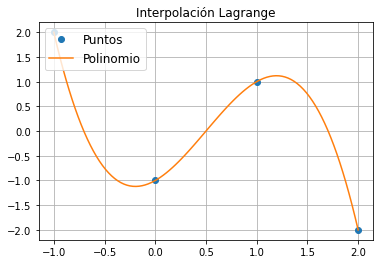

In [0]:
# Puntos para la gráfica
lim1 = np.min(xi)
lim2 = np.max(xi)
muestras = 101
xi_p = np.linspace(lim1,lim2,muestras)
yi_p = polifun(xi_p)
plt.grid(True)
plt.title('Interpolación Lagrange')
plt.plot(xi,yi,'o', label = 'Puntos')
plt.plot(xi_p,yi_p, label = 'Polinomio')
plt.legend(loc='upper left',fontsize=12)
plt.show()

In [0]:
N = len(xi)
## V se puede calcular con
V = np.vander(xi,N)
print('Matriz Vandermonde\n',V)
a = np.dot(np.linalg.inv(V),yi)
print('coeficientes son ' ,a )

Matriz Vandermonde
 [[-1.  1. -1.  1.]
 [ 0.  0.  0.  1.]
 [ 1.  1.  1.  1.]
 [ 8.  4.  2.  1.]]
coeficientes son  [-1.666667  2.5       1.166667 -1.      ]


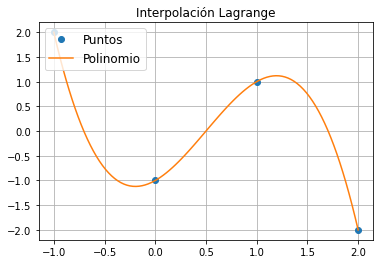

In [0]:
res = lambda x: a[0]*x**3 + a[1]*x**2 +a[2]*x+a[3]
lim1 = np.min(xi)
lim2 = np.max(xi)
muestras = 101
xi_p = np.linspace(lim1,lim2,muestras)
yi_p = res(xi_p)
plt.grid(True)
plt.title('Interpolación Lagrange')
plt.plot(xi,yi,'o', label = 'Puntos')
plt.plot(xi_p,yi_p, label = 'Polinomio')
plt.legend(loc='upper left',fontsize=12)
plt.show()

### 2.- Construir el interpolador de Lagrange para aproximar f(0) si f(-2) = -1, f(-1) =0, f(1) =2, f(2) =3.

In [0]:
xi = np.array([-2, -1, 1, 2])
yi = np.array([-1, -0, 2, 3])

In [0]:
poli,polifun =lagrange(xi,yi)

In [0]:
px = poli.expand() #expandimos para evaluación numérica
px

x + 1

In [0]:
polifun(xi) # evaluanos con los datos para comprobar los valores del polinomio

array([-1., -0.,  2.,  3.])

In [0]:
polifun(0)

0.9999999999999999

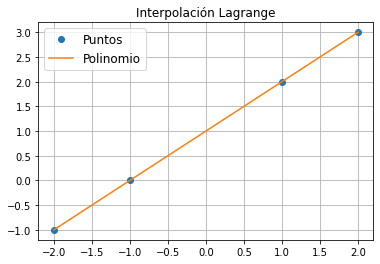

In [0]:
# Puntos para la gráfica
lim1 = np.min(xi)
lim2 = np.max(xi)
muestras = 101
xi_p = np.linspace(lim1,lim2,muestras)
yi_p = polifun(xi_p)
plt.grid(True)
plt.title('Interpolación Lagrange')
plt.plot(xi,yi,'o', label = 'Puntos')
plt.plot(xi_p,yi_p, label = 'Polinomio')
plt.legend(loc='upper left',fontsize=12)
plt.show()

### 3.- Construir el interpolador de Lagrange y Vandermonde  para aproximar f (8.4) si f(8.0) = 1.25, f(8.2) = 1.76, f(8.3) = 1.46, f(8.5) = 1.75.

In [0]:
xi = np.array([8, 8.2, 8.3, 8.5])
yi = np.array([1.25, 1.760,1.46, 1.75])

In [0]:
poli,polifun =lagrange(xi,yi)

In [0]:
px = poli.expand() #expandimos para evaluación numérica
px

66.6666666666661*x**3 - 1651.83333333332*x**2 + 13639.5833333332*x - 37531.4166666663

In [0]:
polifun(xi) # evaluanos con los datos para comprobar los valores del polinomio

array([1.25, 1.76, 1.46, 1.75])

In [0]:
polifun(8.4)

1.323333333333364

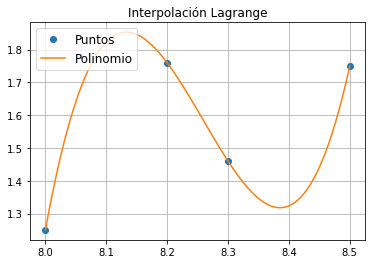

In [0]:
# Puntos para la gráfica
lim1 = np.min(xi)
lim2 = np.max(xi)
muestras = 101
xi_p = np.linspace(lim1,lim2,muestras)
yi_p = polifun(xi_p)
plt.grid(True)
plt.title('Interpolación Lagrange')
plt.plot(xi,yi,'o', label = 'Puntos')
plt.plot(xi_p,yi_p, label = 'Polinomio')
plt.legend(loc='upper left',fontsize=12)
plt.show()

In [0]:
N = len(xi)
## V se puede calcular con
V = np.vander(xi,N)
print('Matriz Vandermonde\n',V)
a = np.dot(np.linalg.inv(V),yi)
print('coeficientes son ' ,a )

Matriz Vandermonde
 [[512.    64.     8.     1.  ]
 [551.37  67.24   8.2    1.  ]
 [571.79  68.89   8.3    1.  ]
 [614.12  72.25   8.5    1.  ]]
coeficientes son  [    66.67  -1651.83  13639.58 -37531.42]


In [0]:
res = lambda x: a[0]*x**3 + a[1]*x**2 +a[2]*x+a[3]

In [0]:
res(8.4)

1.3233333333773771

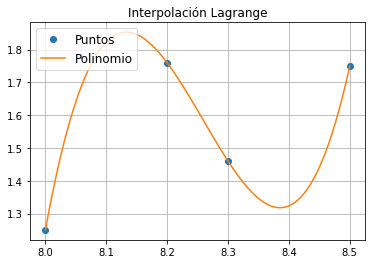

In [0]:

lim1 = np.min(xi)
lim2 = np.max(xi)
muestras = 101
xi_p = np.linspace(lim1,lim2,muestras)
yi_p = res(xi_p)
plt.grid(True)
plt.title('Interpolación Lagrange')
plt.plot(xi,yi,'o', label = 'Puntos')
plt.plot(xi_p,yi_p, label = 'Polinomio')
plt.legend(loc='upper left',fontsize=12)
plt.show()

### 4.- Dados los siguientes datos.
x =  −1.2 0.3 1.1 

y = −5.76 −5.61 −3.69

Encontrar y(0) mediante  Lagrange y Vandermonde

### 5.- Dados los siguientes datos
x = 0 0.5 1 1.5 2 2.5 3

y = 1.8421 2.4694 2.4921 1.9047 0.8509 −0.4112 −1.5727

Encontrar  y(1.2) utilizando Lagrange seleccionando a) 3 puntos vecinos y b) 4 puntos vecinos

### 6.- Use un polinomio de interpolación de Lagrange de primer y segundo grado para evaluar la densidad del aceite de motor no utilizado a T = 15 ° C en base a los siguientes datos:
x1 = 0 , f(x1) = 3.85

x2 = 20,  f(x2) = 0.800

x3 = 40, f(x3) = 0.212


### 7.- Encontrar y(3.5) mediante Vandermonde y Lagrange  
x  0 1.8 5 6 8.2 9.2 12

y  26 16.415 5.375 3.5 2.015 2.54 8

In [0]:
xi = np.array([0., 1.8, 5., 6.,8.2,9.2,12.])
yi = np.array([26.,16.415,5.375,3.5,2.015,2.54,8.])

In [0]:
poli,polifun =lagrange(xi,yi)

In [0]:
px = poli.expand() #expandimos para evaluación numérica
px

-2.60208521396521e-18*x**6 + 8.32667268468867e-17*x**5 - 2.22044604925031e-16*x**4 + 7.105427357601e-15*x**3 + 0.375*x**2 - 5.99999999999999*x + 26.0

In [0]:
polifun(xi) # evaluanos con los datos para comprobar los valores del polinomio

array([26.   , 16.415,  5.375,  3.5  ,  2.015,  2.54 ,  8.   ])

In [0]:
polifun(3.5)

9.593750000000007

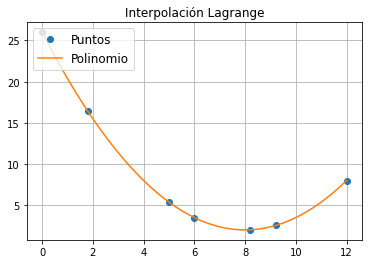

In [0]:
# Puntos para la gráfica
lim1 = np.min(xi)
lim2 = np.max(xi)
muestras = 101
xi_p = np.linspace(lim1,lim2,muestras)
yi_p = polifun(xi_p)
plt.grid(True)
plt.title('Interpolación Lagrange')
plt.plot(xi,yi,'o', label = 'Puntos')
plt.plot(xi_p,yi_p, label = 'Polinomio')
plt.legend(loc='upper left',fontsize=12)
plt.show()

### 8.-Estime el logaritmo común de 10 usando interpolación lineal mediante Vandermonde y Laplace.
(a) Interpolar entre log 8.5 = 0.9030900 y log 12.5= 1.0791812.

(b) Interpolar entre log 9.5 = 0.9542425 y log 11.5 = 1.0413927.
Para cada una de las interpolaciones, calcule el porcentaje de error relativo basado en el verdadero valor



In [0]:
xi = np.array([9.5,11.5])
yi = np.array([0.9542425,1.0413927])

In [0]:
poli,polifun =lagrange(xi,yi)

In [0]:
px = poli.expand() #expandimos para evaluación numérica
px

0.0435750999999999*x + 0.540279050000001

In [0]:
polifun(xi) # evaluanos con los datos para comprobar los valores del polinomio

array([0.954243, 1.041393])

In [0]:
polifun(10)

0.97603005

In [0]:
error = (1.0 - polifun(10))*100
print ('error es ', error, 'por ciento')

error es  2.3969950000000018 por ciento


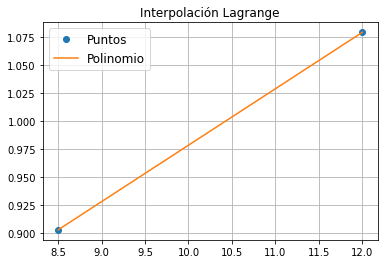

In [0]:
# Puntos para la gráfica
lim1 = np.min(xi)
lim2 = np.max(xi)
muestras = 101
xi_p = np.linspace(lim1,lim2,muestras)
yi_p = polifun(xi_p)
plt.grid(True)
plt.title('Interpolación Lagrange')
plt.plot(xi,yi,'o', label = 'Puntos')
plt.plot(xi_p,yi_p, label = 'Polinomio')
plt.legend(loc='upper left',fontsize=12)
plt.show()

In [0]:
N = len(xi)
## V se puede calcular con
V = np.vander(xi,N)
print('Matriz Vandermonde\n',V)
a = np.dot(np.linalg.inv(V),yi)
print('coeficientes son ' ,a )

Matriz Vandermonde
 [[ 8.5  1. ]
 [12.   1. ]]
coeficientes son  [0.0503 0.4754]


In [0]:
res = lambda x: a[0]*x+a[1]

In [0]:
res(10)

0.9785576571428574

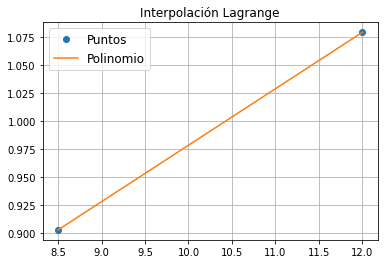

In [0]:

lim1 = np.min(xi)
lim2 = np.max(xi)
muestras = 101
xi_p = np.linspace(lim1,lim2,muestras)
yi_p = res(xi_p)
plt.grid(True)
plt.title('Interpolación Lagrange')
plt.plot(xi,yi,'o', label = 'Puntos')
plt.plot(xi_p,yi_p, label = 'Polinomio')
plt.legend(loc='upper left',fontsize=12)
plt.show()